# Introduction To K-Means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or classes). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable **K**. The algorithm works iteratively to assign each data point to one of K groups based on the input features that are provided. Data points are clustered based on feature similarity.

The results of the K-means clustering algorithm are:


1. Labels for the training data (each data point is assigned to a single group, called cluster)

2. The centroids of the K clusters, which can be used to label new data, that is unseen data.

Clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a mean vector of feature values which define the resulting groups.   

This introduction to the K-means clustering algorithm covers:

- Common business cases where K-means is used
- The steps involved in running the algorithm
- A Python example using delivery fleet data 

### Business Uses:

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been trained and the groups are defined, any new data (unseen data) can be easily assigned to the correct group.

This is a versatile algorithm that can be used for many common type of grouping. Some examples of use cases are:

- **Behavioral segmentation:**
 1. Segment by purchase history
 2. Segment by activities on website,applications
 3. Create profiles based on activity monitoring
 
- **Inventory categorization:**
 1. Group inventory by sales activity
 2. Group inventory by manufacturing metrics
 
- **Sorting sensor measurements:**
 1. Detect activity types in motion sensors
 2. Group images
 3. Separate audio

In addition, monitoring if a tracked data point switches between groups over time can be used to detect meaningful changes in the data.

### Algorithm

!["Alt Text"](K-Means_Clustering_print.png "k-means demo")

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters Κ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:

1. **Data assigment step:**

Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance. More formally, if ci is the collection of centroids in set C, then each data point x is assigned to a cluster based on


!["Alt Text"](math.svg "svg image")

where dist( · ) is the standard (L2) Euclidean distance. Let the set of data point assignments for each ith cluster centroid be Si.

2. **Centroid update step:**

In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.

!["Alt Text"](math_1.svg "svg image")

The algorithm iterates between steps one and two until a stopping criteria is met (i.e., no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

This algorithm is guaranteed to converge to a result. The result may be a local optimum (i.e. not necessarily the best possible outcome), meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

## Choosing K

The algorithm described above finds the clusters and data set labels for a particular pre-chosen K. To find the number of clusters in the data, the user needs to run the K-means clustering algorithm for a range of K values and compare the results. In general, there is no method for determining exact value of K, but an accurate estimate can be obtained using the following techniques.

One of the metrics that is commonly used to compare results across different values of K is the mean distance between data points and their cluster centroid. Since increasing the number of clusters will always reduce the distance to data points, increasing K will always decrease this metric, to the extreme of reaching zero when K is the same as the number of data points. Thus, this metric cannot be used as the sole target. Instead, mean distance to the centroid as a function of K is plotted and the "elbow point," where the rate of decrease sharply shifts, can be used to roughly determine K.

A number of other techniques exist for validating K, including cross-validation, information criteria, the information theoretic jump method, the silhouette method, and the G-means algorithm. In addition, monitoring the distribution of data points across groups provides insight into how the algorithm is splitting the data for each K.

!["Alt Text"](introduction-to-k-means-clustering-elbow-point-example.webp "graph image")

### Example: Applying K-Means Clustering To Delivery Fleet Data


As an example, we'll show how the K-means algorithm works with a sample dataset of delivery fleet driver data. For the sake of simplicity, we'll only be looking at two driver features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit. In general, this algorithm can be used for any number of features, so long as the number of data samples is much greater than the number of features.

### Step 1: Clean and Transform Your Data

Already done and the dataset is clean

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans


In [44]:
df = pd.read_csv('data_1024.csv',sep='\t')

In [47]:
df.shape

(4000, 3)

In [10]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [13]:
sns.set(style="darkgrid")

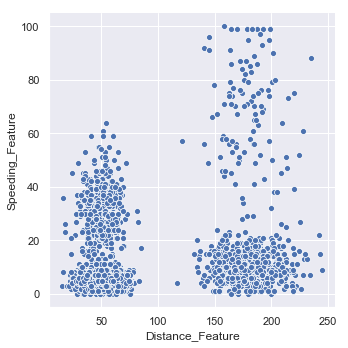

In [14]:

sns.relplot(x="Distance_Feature", y="Speeding_Feature", data=df)

The graph above shows the dataset for 4,000 drivers, with the distance feature on the x-axis and speeding feature on the y-axis.



### Step 2: Choose K and Run the Algorithm
First let us drop the `Driver_ID` as it has no use here.
Start by choosing K=2. For this example, use the Python packages scikit-learn's `KMean` class and NumPy for computations as shown below:

In [20]:
df = df.drop('Driver_ID', axis=1)

In [21]:
X = df.values

In [25]:
kmeans = KMeans(n_clusters=2,random_state=42)

In [26]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

The cluster labels are returned in `kmeans.labels_`.

In [28]:
# View predict classes
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

### Step 3: Review the Results


The chart below shows the results. Visually, you can see that the K-means algorithm splits the two groups based on the distance feature. Each cluster centroid is marked with a star.

-  Group 1 Centroid = (50, 5.2)
-  Group 2 Centroid = (180.3, 10.5)


Using domain knowledge of the dataset, we can infer that Group 1 is urban drivers and Group 2 is rural drivers.

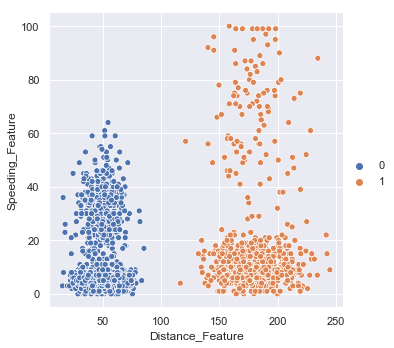

In [48]:
sns.relplot(x="Distance_Feature", y="Speeding_Feature", hue=kmeans.labels_ , data=df)

In [49]:
# View cluster centers that is "centroids" of each cluster
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

**Quiz:** How to superimpose these centroids on the above plots with a different glyphs, like a star or something like that.

### Step 4: Iterate Over Several Values of K
Test how the results look for K=4. To do this, all you need to change is the target number of clusters in the `KMeans()` initialization.

In [34]:
kmeans02 = KMeans(n_clusters=4).fit(X)

The plot below shows the resulting clusters. We see that four distinct groups have been identified by the algorithm; now speeding drivers have been separated from those who follow speed limits, in addition to the rural vs. urban divide. The threshold for speeding is lower with the urban driver group than for the rural drivers, likely due to urban drivers spending more time in intersections and stop-and-go traffic.

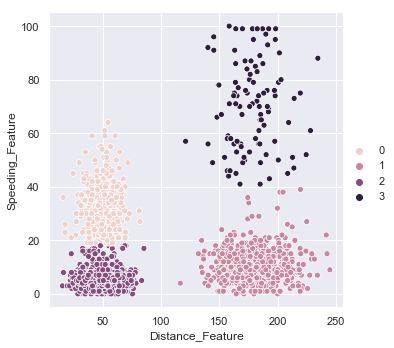

In [41]:
sns.relplot(x="Distance_Feature", y="Speeding_Feature", hue=kmeans02.labels_ , data=df)

In [42]:
# View cluster centers that is "centroids" of each cluster
kmeans02.cluster_centers_

array([[ 50.40482436,  32.36533958],
       [180.34311782,  10.52011494],
       [ 49.99263253,   5.20447169],
       [177.83509615,  70.28846154]])

It is important to note **three** things about K-means.

1. k-means clustering assumes the clusters are convex shaped (ex: a circle ,a sphere).
2. All featured are equally scaled.We did not do this step, but it is important step, so repeat the project with this step.
3. The groups are balanced(i.e, have roughly the same number of samples/observations)


If we suspect that we cannot meet these assumptions, we might try other clustering approaches.

### Alternatives
A number of alternative clustering algorithms exist including DBSCAN, Mean-Shift, Agglomerative clustering and Gaussian Mixtures Models(GMM).  You can read more about alternatives to K-means in another notebook.